<a href="https://colab.research.google.com/github/chrishunt11/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Christopher Hunt

## Project Overview


### Link to original dataset from Analytics Vidhya: 
- [Analytics Vidhya Link](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

### Data Dictionary for this dataset:
- [Data Dictionary](https://drive.google.com/file/d/1zTSwo2__MqZsTqetwajXurSwDbwGnMd5/view?usp=drive_link)


## Load and Inspect Data

In [155]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file using pandas then assigning it to df
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

# Viewing the first 5 rows in the DataFrame
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [156]:
# Taking a look at how many rows, columns in the dataset
df.shape

(8523, 12)

In [157]:
# looking at the basic information in the dataset (rows, columns, non-null count, dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [158]:
# Creating a copy of the dataframe before making any changes
df2 = df.copy()

## Clean Data

#### Checking the amount of rows and columns

In [159]:
# Checking for rows, columns
df.shape

(8523, 12)

There are 8523 rows and 12 columns

#### Data types of each variable



In [160]:
# checking the data types for each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Checking for duplicates

In [161]:
# Checking for any duplicates 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [162]:
# Finding the sum for duplicated values
df.duplicated().sum()

0

There are not any duplicate values in this dataset

#### Changing a Data Type

In [ ]:
# removing the 'Tier' string from 'Outlet_Location_Type'
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str.replace('Tier', '')
df['Outlet_Location_Type'].head()

In [ ]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(float)
df['Outlet_Location_Type'].dtype

#### Identifying Missing Values

##### Seperating numerical and categorical columns

In [163]:
# Seperating the numeric and categorical columns
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns
print(f'Categorical columns: {cat_cols} \n\n Numeric columns: {num_cols}')

Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object') 

 Numeric columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


##### Addressing the missing values by using a placeholder value.

###### Categorical columns

In [164]:
# Checking the sum of the NaN values in cat_cols
df[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [165]:
# Taking a look at Outlet Size values
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [166]:
# Filling in 'MISSING' for the NaN values in Outlet_Size
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

###### Numerical Columns

In [167]:
# Checking the sum of the NaN values in num_cols
df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [168]:
# Taking a look at 'Item Weight' values
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [169]:
# Finding the stats behind the Item_Weight column
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [170]:
# Assigning the mean of 'Item_Weight' to a variable
item_mean = df['Item_Weight'].mean()
item_mean

12.857645184135976

In [171]:
# Filling in the mean weight to all the missing values in the 'Item_Weight' column
df['Item_Weight'] = df['Item_Weight'].fillna(item_mean)
df['Item_Weight'].value_counts(dropna=False)

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

##### Confirming no more missing values

In [172]:
# Checking the entire DataFrame for any missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Finding and fixing any inconsistencies

In [175]:
# Creating a variable for string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [176]:
# Using a for loop to print out the value counts of each string column
for col in string_cols:
  print(f'Value count: {col}')
  print(df[col].value_counts())
  print('\n')

Value count: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count: Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OU

In [177]:
# Taking a look at 'Item_Fat_Content' values
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [178]:
# Fixing the inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                         'reg' : 'Regular',
                                                         'low fat' : 'Low Fat'})

In [179]:
# Checking value counts for Item_Fat_Content again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Printing the stats for the numerical columns

In [180]:
# Using a for loop to print out the stats for any numerical column
for col in num_cols:
  print(f'Stats for:{col}')
  print(df[col].describe())
  print('\n')

Stats for:Item_Weight
count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Stats for:Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Stats for:Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Stats for:Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Stats for:Item_Outlet_Sales
count     8523.000000
mean      2181.2

## Exploratory Data Analysis

### Heatmap of Data

In [181]:
# creating a correlation in the dataframe
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.00,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.03,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.00,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.09,-0.05
Outlet_Location_Type,0.00,-0.03,0.00,-0.09,1.00,0.09
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,0.09,1.00


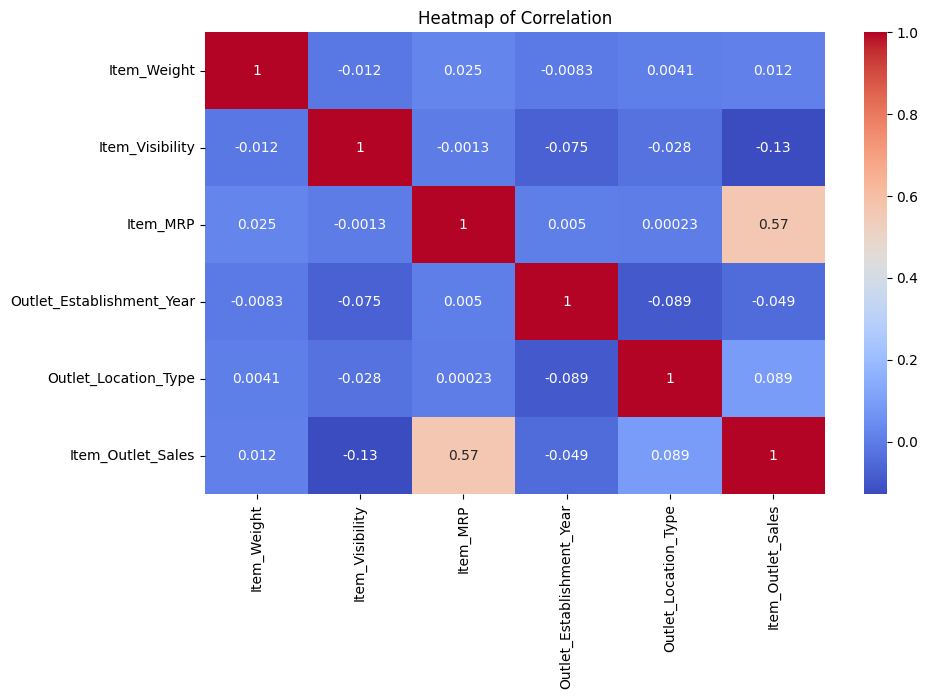

In [182]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

### Histogram

##### Item Visibility

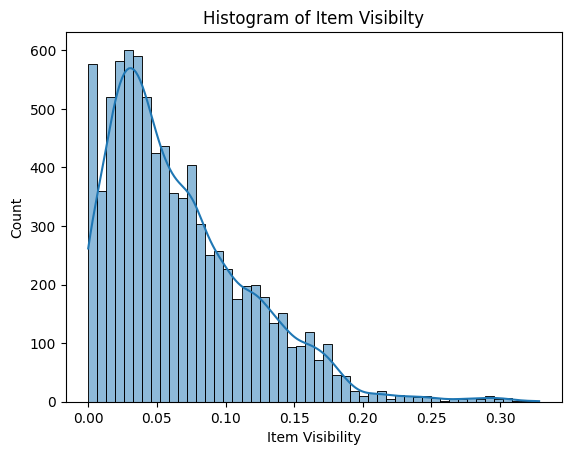

In [183]:
# Creating a histogram of Item Visibility
ax = sns.histplot(data=df, x='Item_Visibility', kde=True)

# setting the title, xlabel, and ylabel
ax.set_title('Histogram of Item Visibilty');
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

##### Item Sales

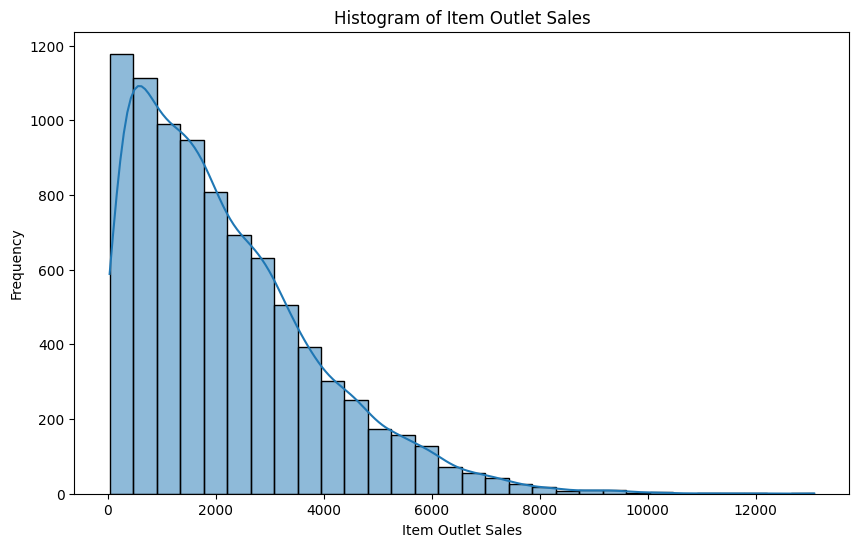

In [184]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating hisogram of item outlet sales
ax = sns.histplot(data=df, x='Item_Outlet_Sales', bins=30, kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item Outlet Sales');

##### MRP

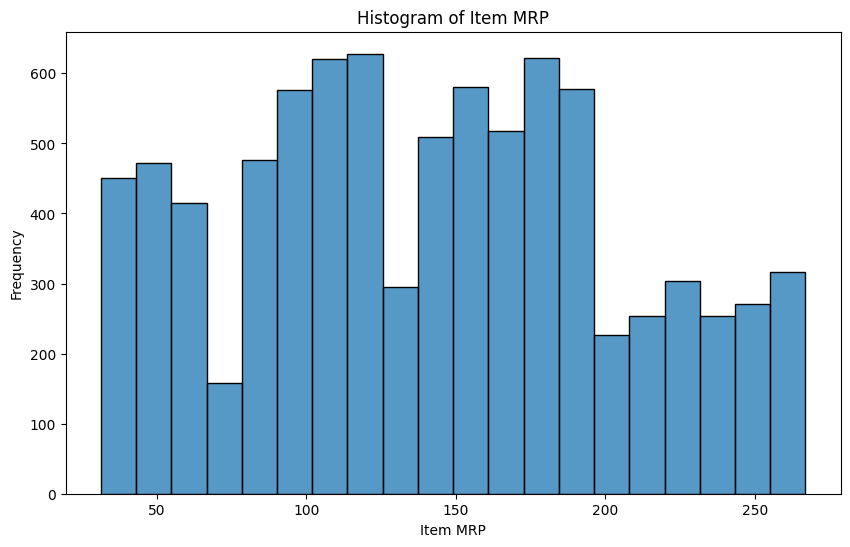

In [185]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# Histogram of Item MRP
ax = sns.histplot(df['Item_MRP'], bins=20, edgecolor='black')

# setting the xlabel, ylabel, and title
ax.set_xlabel('Item MRP')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item MRP');

### Countplot

##### Outlet Types

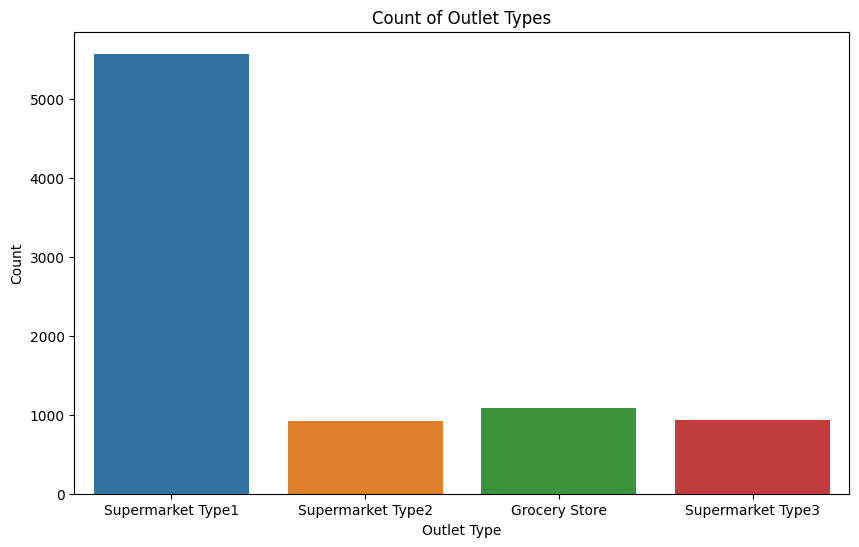

In [186]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet type
ax = sns.countplot(data=df, x='Outlet_Type')

# creating the xlabel, ylabel, and title
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types');

##### Outlet Types by Location

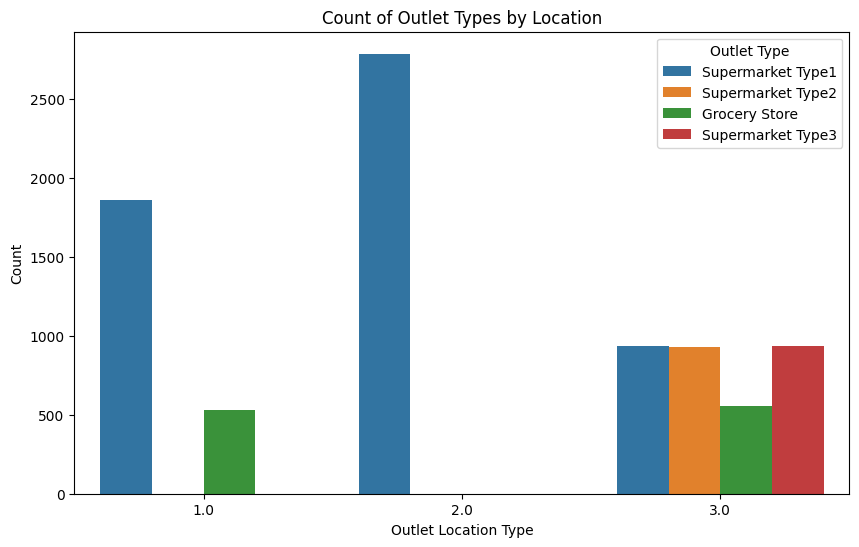

In [187]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet location type and outlet type
ax = sns.countplot(data=df, x='Outlet_Location_Type', hue='Outlet_Type')

# changing the xlabel, ylabel, title, and setting a legend
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types by Location')
plt.legend(title='Outlet Type');

### Boxplot

##### Outlet Size vs Outlet Sales

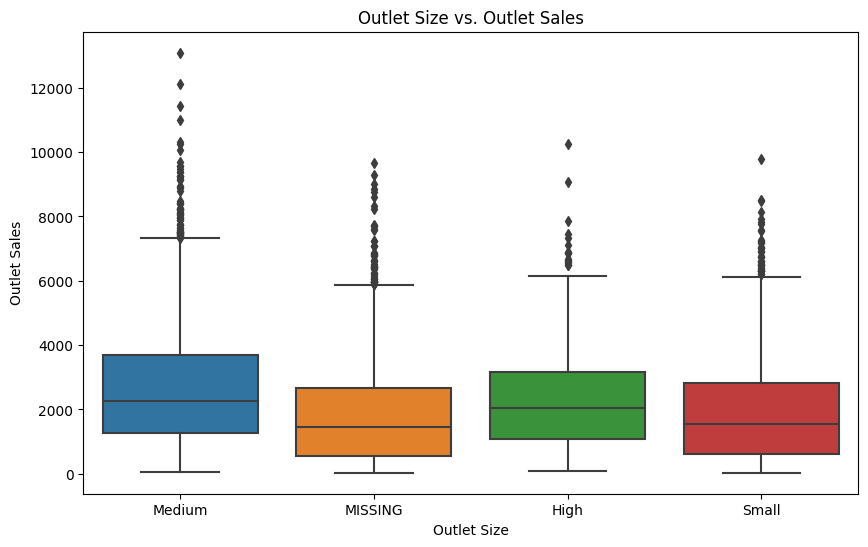

In [188]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a boxplot of the outlet size vs outlet sales
ax = sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

# creating xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Outlet Sales')
ax.set_title('Outlet Size vs. Outlet Sales');

##### Outlet Type vs Outlet Sales

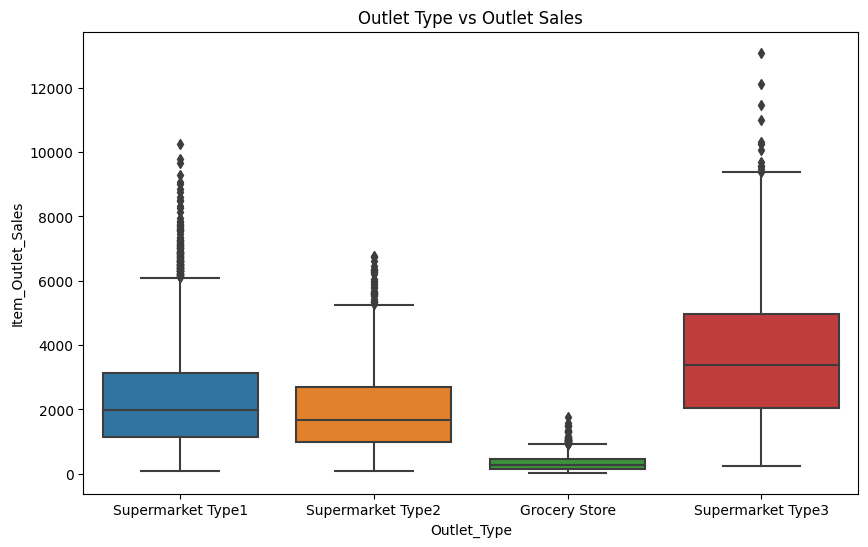

In [189]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a boxplot of the outlet sales vs outlet type
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Outlet_Type')
ax.set_xlabel('Outlet_Type')
ax.set_ylabel('Item_Outlet_Sales');
ax.set_title('Outlet Type vs Outlet Sales');

### Barplots

##### Sales per Outlet Type

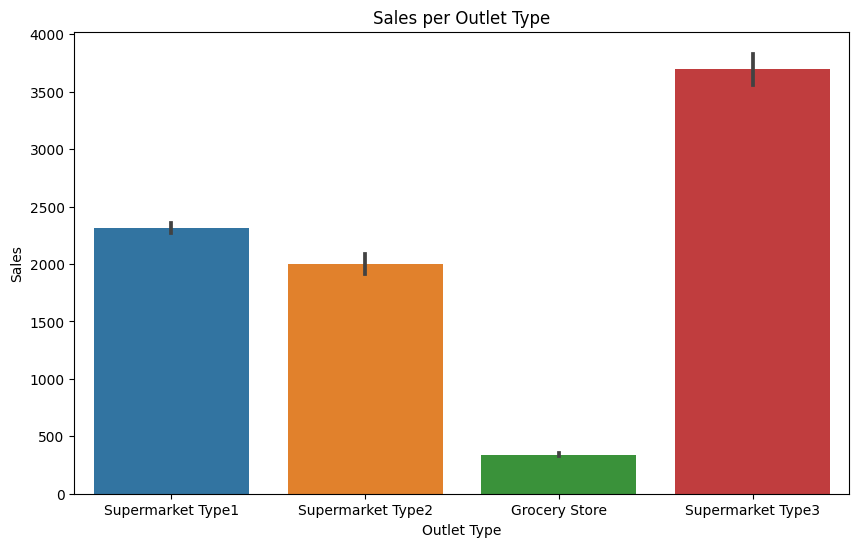

In [190]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot of the sales per outlet type
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')

# creating a xlabel, ylabel, and a title
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Sales')
ax.set_title('Sales per Outlet Type');

##### Average Sales per Outle Type

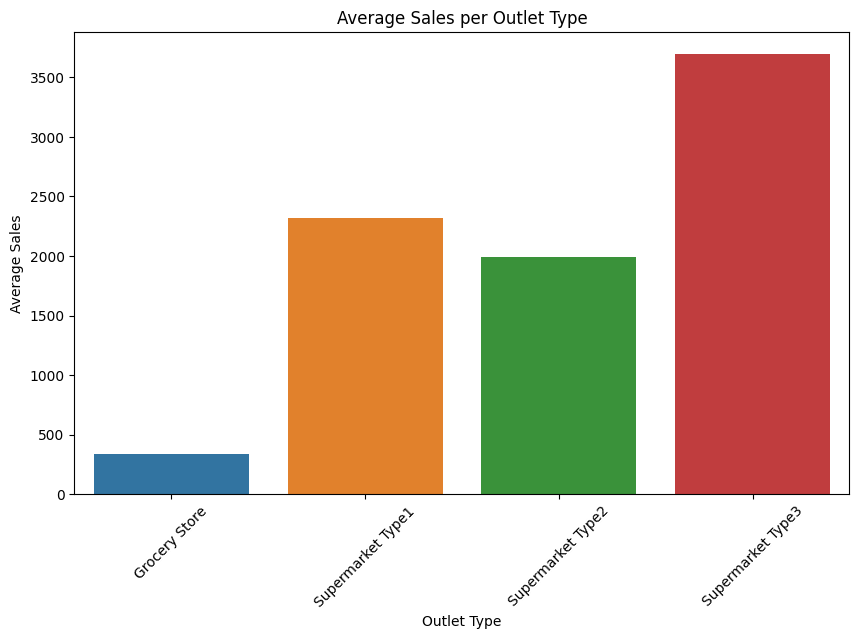

In [191]:
# using groupby to to find the average sales per outlet
average_sales_per_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

# changning the figure size
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sales_per_outlet, x='Outlet_Type', y='Item_Outlet_Sales')

# setting the xlabels, ylabels, title, and rotating the xlabels 45 degrees
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales per Outlet Type')
plt.xticks(rotation=45);

##### Average Sale per Item Type

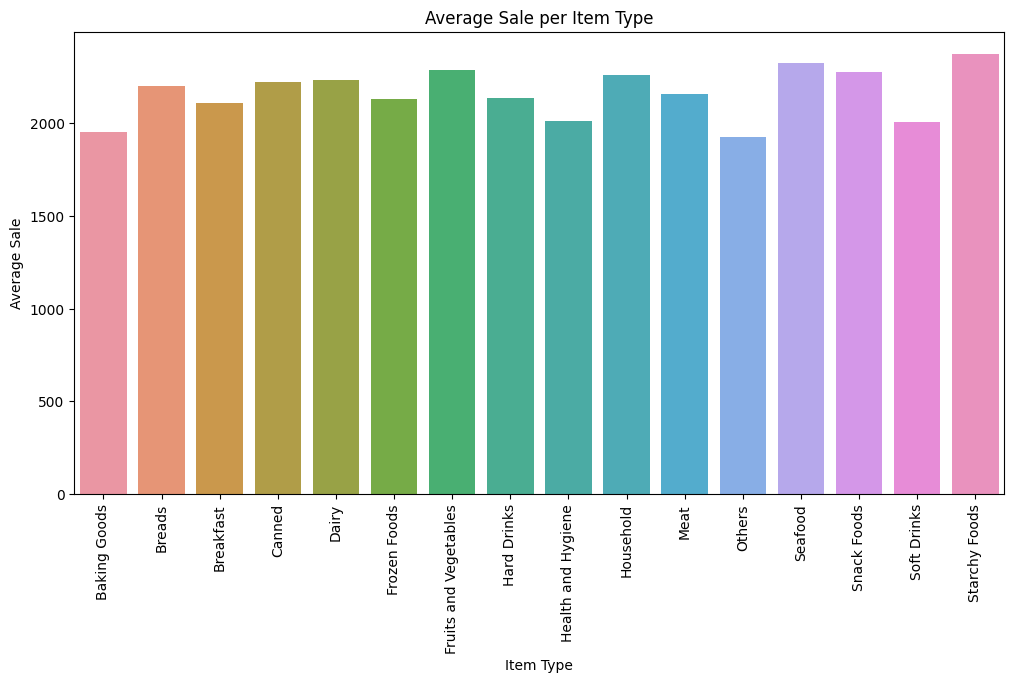

In [192]:
# using groupby to find the average sale per item type
average_sale_per_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index()

# changing the size of the figure
plt.figure(figsize=(12, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_item, x='Item_Type', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, title, and rotating the xlabels 90 degrees
ax.set_xlabel('Item Type')
ax.set_ylabel('Average Sale')
ax.set_title('Average Sale per Item Type')
plt.xticks(rotation=90)
plt.show()


##### Sales on Low fat vs Regular

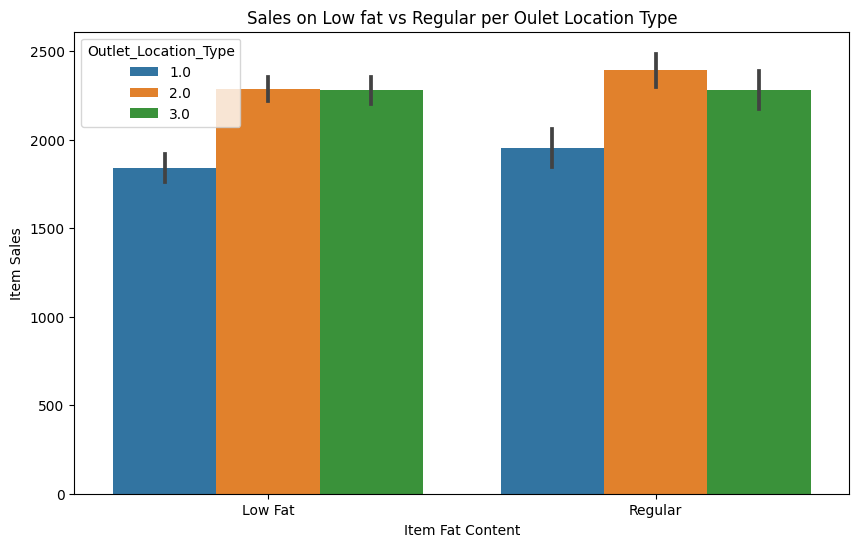

In [193]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Outlet_Location_Type')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Low fat vs Regular per Oulet Location Type');

##### Sales on Outlet Size

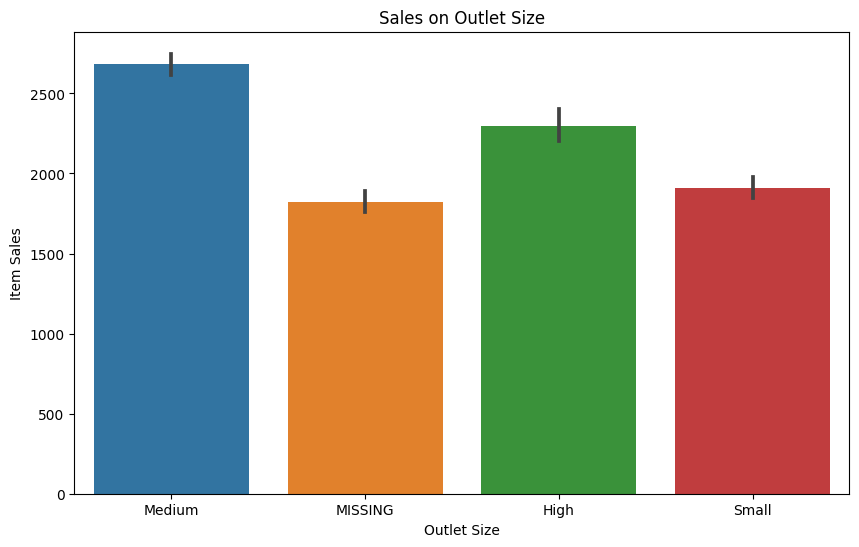

In [194]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Outlet Size');

## Explanatory Data Analysis